In [2]:
import numpy as np
from scipy.optimize import fmin_tnc
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_3000\217360987.py:51: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


The accuracy of the model is 89.0
The model parameters using Gradient descent


[-25.16131852   0.20623159   0.20147149]


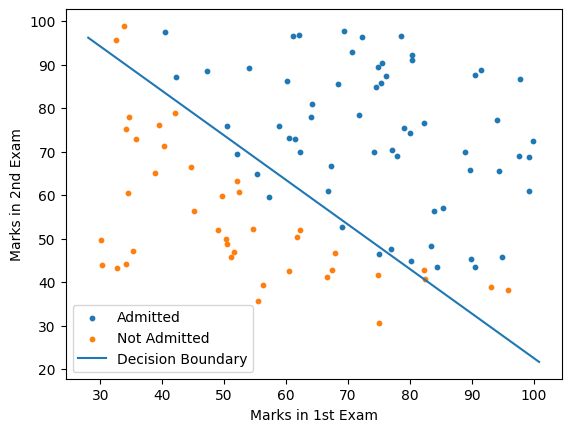

In [10]:
class LogisticRegressionUsingGD:
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)
        

    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))
    
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(y * np.log(self.probability(theta, x)) + (1 - y) * np.log(1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)
    
    def fit(self, x, y, theta):
        opt_weights = fmin_tnc(func=self.cost_function,x0=theta, fprime=self.gradient,args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes,probab_threshold=0.5):
        predicted_classes = (self.predict(x) >=probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes ==actual_classes)
        return accuracy * 100

def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df
    
if __name__ == "__main__":
    data = load_data(r"C:\Users\user\Desktop\JP\CSV\Mark_data.txt", None)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    admitted = data.loc[y == 1]
    not_admitted = data.loc[y == 0]
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10,label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,label='Not Admitted')
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))
    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("The accuracy of the model is {}".format(accuracy))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1],x_values)) / parameters[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()



